In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/dissertation/final')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%run 'import_final.ipynb'

In [3]:
%run 'functions_final.ipynb'

In [4]:
%run 'agents_final.ipynb'

In [5]:
%run 'plotting_final.ipynb'

In [6]:
%run 'simulations_final.ipynb'

In [7]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
results_path = './numerical_results'

In [8]:
file_headers_to_load = ['2Traders_0Fees_9995LW_5a']
agent_names = [ 'Trained Agent'] 

In [9]:
agents_dict, parameters_dict, bellman_loss_dict, bellman_approx_dict = load_agents_from_file_headers(file_headers_to_load, agent_names)
agents_dict = add_ideal_agents(agents_dict, parameters_dict, same_conditions=True)

success
GPU not available
tensor([0.0744])


In [10]:
for parameters in list(parameters_dict.values()):
  print(parameters)

{'market_args': {'trade_size': 1.0, 'R_long': 0.2, 'R_short': 0.2, 'fee_infrastructure': 0.0, 'l_initial': 2.0, 'l_search': 1.5, 'l_release': 2.5, 'random_agent_update': True, 'variable_fees': False, 'CPFM_kw_args': {'fee_liquidity': 0.0, 'num_traders': 2, 'traders_pay_fees': True}}, 's_args': {'sigma': 1.0, 'tau': 0.00011407711613050422, 'mu': 0.0, 'increment_type': 'BM'}, 'x0_args': {'sigma': 0.2, 'mu': 13.815510557964274, 'initial_price': 3000, 'reference_variation': 0, 'reference_min': 0.0, 'T': 0.0, 'ga_var': 0.0, 'ga_mean': 0.0, 'ma_var': 0.0, 'M_i': 0.4, 'dim': 6, 'x0_kwargs': {'mean_gen_int': 10, 'var_gen_int': 2, 'min_gen_int': 2}}, 'utility_args': {'kind': 'Linear Wealth Inventory Penalty', 'penalty_factor': 0.0}, 'learning_args': {'n_batch': 60000, 'n_mc': 100, 'gamma': 0.9995, 'lr': 0.005, 'discount_factor': 0.95, 'dims': 6, 'milestones': [1000], 'scheduler': 'Exponential'}, 'C_args': {'hidden_dims_C': [20, 20], 'activation_C': 'nn.Sigmoid', 'output_activation_C': 'nn.Softm

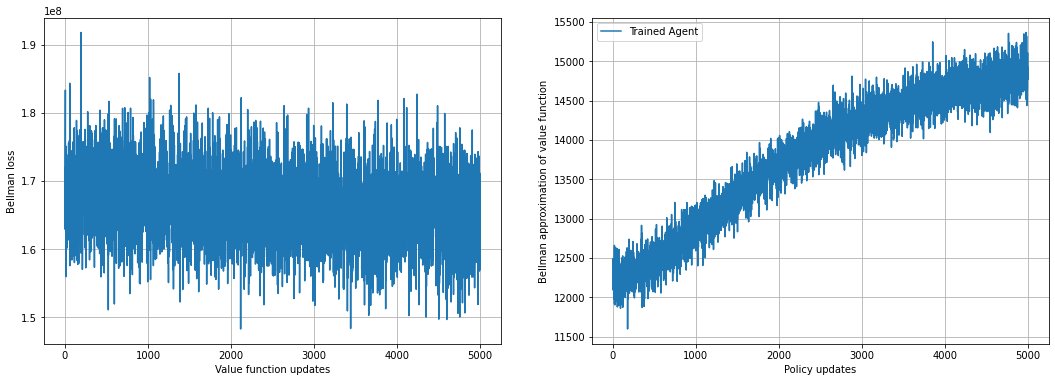

In [11]:
plot_bellman(bellman_loss_dict, bellman_approx_dict,save_fig=False)

In [12]:
n_mc = 10000
n_steps = 100
# Assumes the same x0_sampler and s_args for all agents

# IMPORTANT : sample from the initial distribution not from the test data 
# generator in the agent
parameters_dict[agent_names[0]]['x0_args']['x0_kwargs']['fee_range'] = 0.05
simulation_sampler = partial(sample_x0, device=device, **parameters_dict[agent_names[0]]['x0_args']) 

results = simulate_strategies(agents_dict, n_mc, n_steps, simulation_sampler, **parameters_dict[agent_names[0]]['s_args'])

#results = simulate_strategies_var_fees(agents_dict, n_mc, n_steps, simulation_sampler, [0, 0.005, 0.01, 0.03], **parameters_dict[agent_names[0]]['s_args'])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [13]:
for result in results:
    pnl = result.final_profits()
    pnl, __ = torch.sort(pnl)

    perc = 0.1

    print(f'{result.name} - Mean PnL: {torch.mean(pnl)}, Std: {torch.std(pnl)}')
    # print(torch.quantile(pnl, torch.tensor([0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99], device = device)))
    pnl_reduced = pnl[pnl.ge(torch.quantile(pnl, perc)) & pnl.le(torch.quantile(pnl, 1 - perc))]

Trained Agent - Mean PnL: 2201.6306155414163, Std: 1262.695878054306
Ideal Agent - Mean PnL: 2208.777217314493, Std: 1270.0553438620318


0


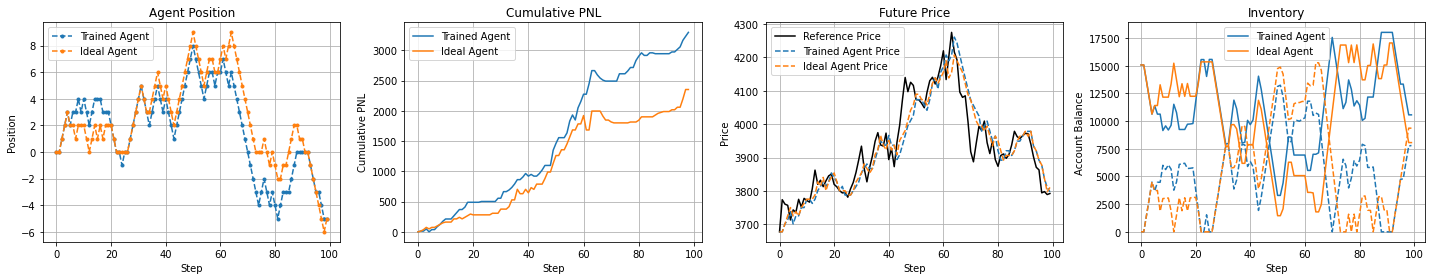

1


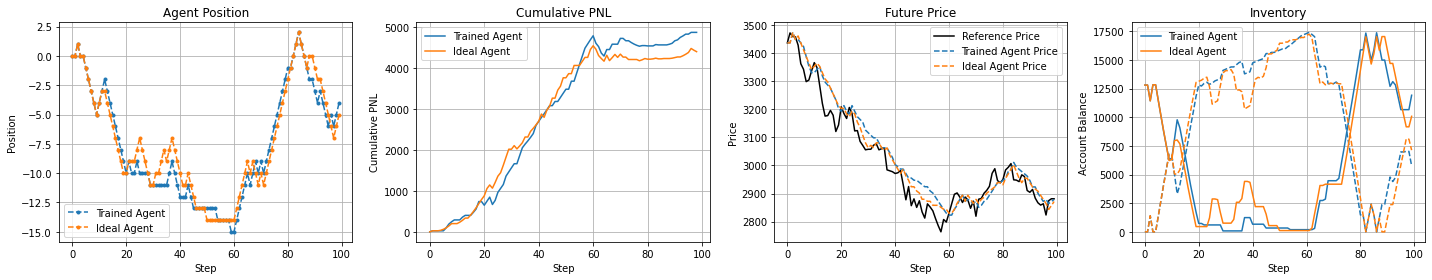

2


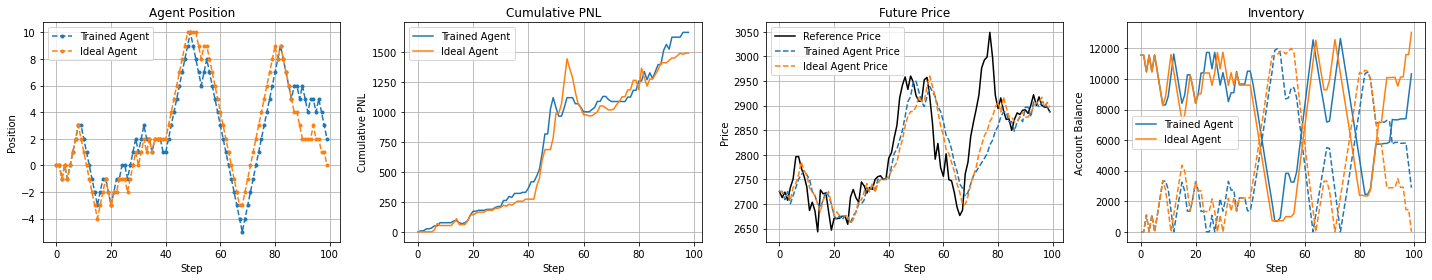

3


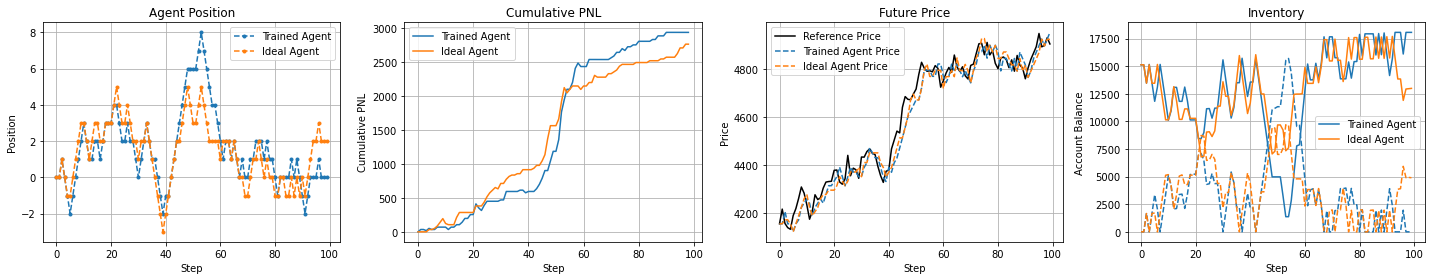

4


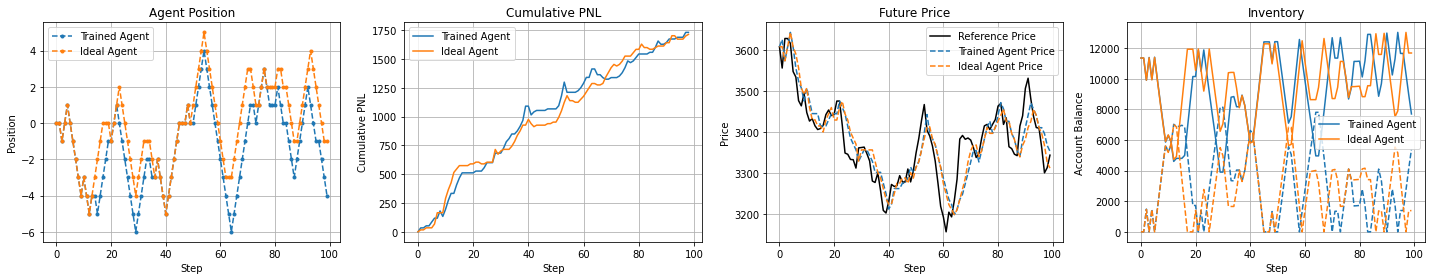

In [14]:
make_comparison_plots(results, 5, save_fig=False)

0


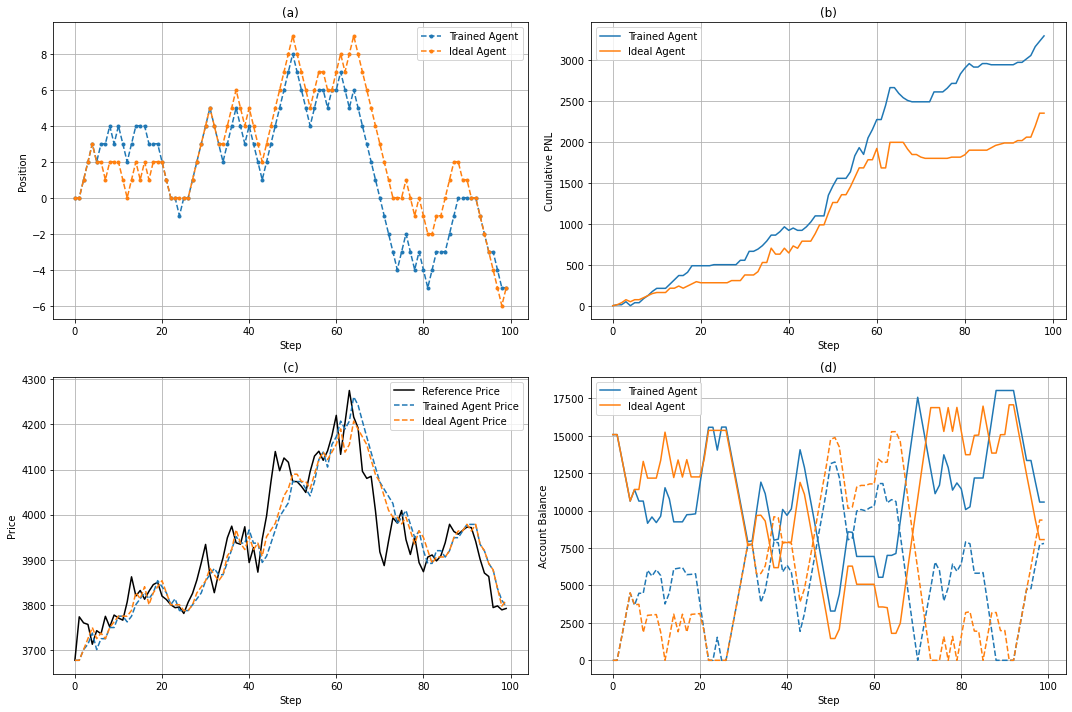

In [15]:
save_fig = True
fig_name = '2Trader_SimulationExample_1.png'
make_comparison_plots_square(results, 1, save_fig=save_fig)

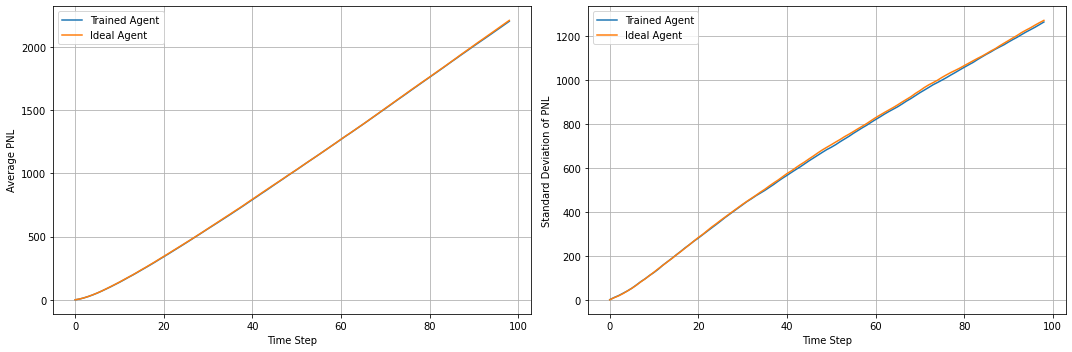

In [16]:
plot_average_pnl_over_time(results)

In [17]:
ideal_result = None
for result in results:
  if result.name == 'Ideal Agent':
    ideal_result = result

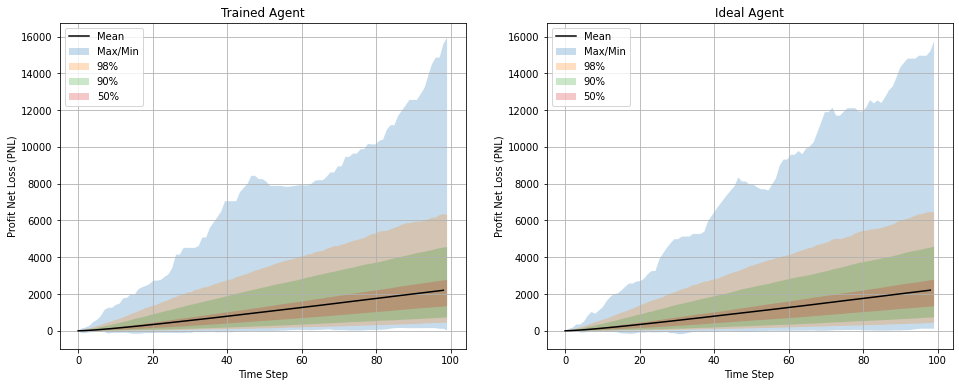

In [18]:
result_to_show = None
for result in results:
  if result.name == 'Trained Agent':
    result_to_show = result

fig_name = 'Quantiles'
compare_quantiles([result_to_show, ideal_result],save_fig=False)


9802


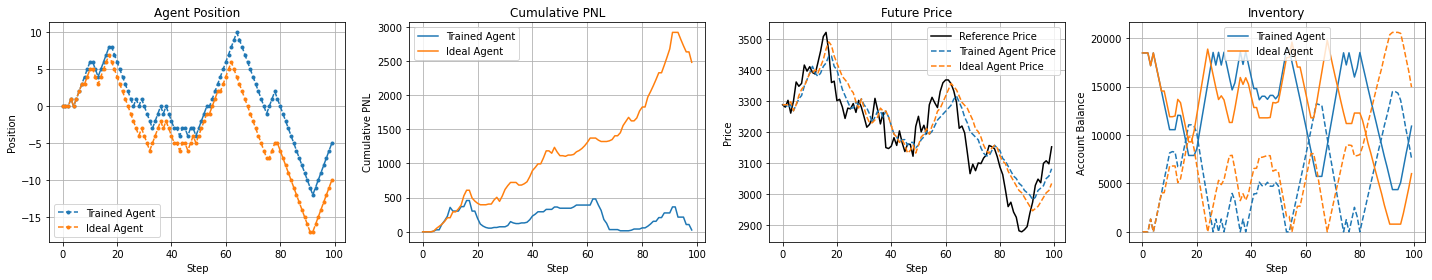

In [19]:
worst_index = plot_worst_pnl(result_to_show, ideal_result, save_fig=False)

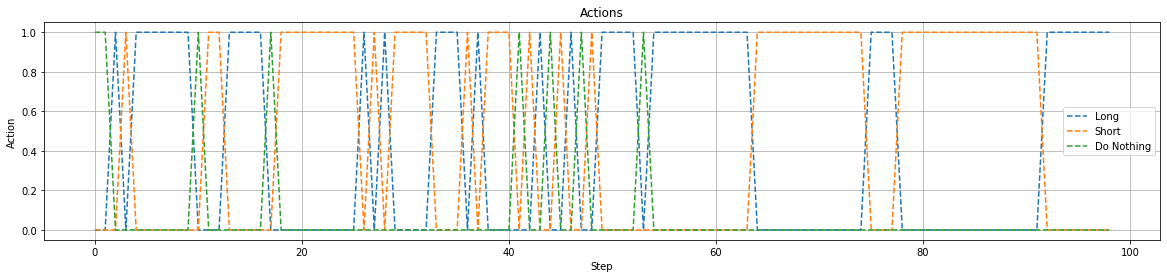

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))

plot_action_multi(ax, worst_index, [result_to_show], multi=True)

7978


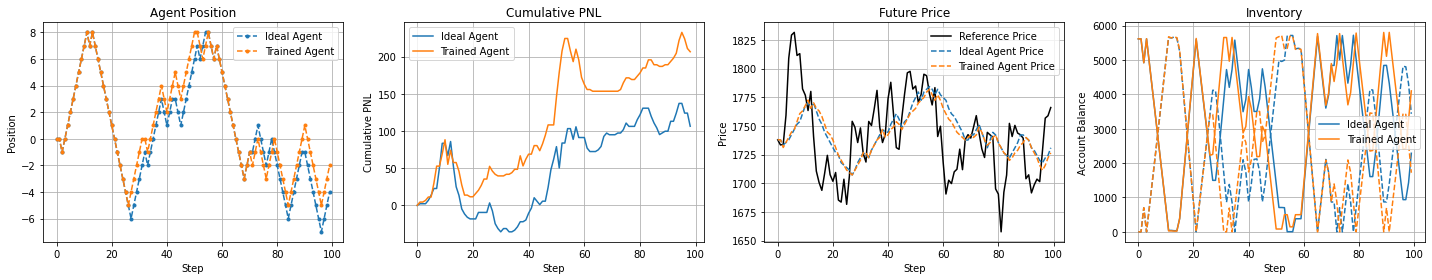

array(7978)

In [21]:
plot_worst_pnl(ideal_result, result_to_show, save_fig=False)

In [22]:
file_headers_to_load = ['PMU_0Fees_9995LW_5a']
agent_names = [ 'Trained Agent'] 

In [23]:
agents_dict, parameters_dict, bellman_loss_dict, bellman_approx_dict = load_agents_from_file_headers(file_headers_to_load, agent_names)
agents_dict = add_ideal_agents(agents_dict, parameters_dict, same_conditions=True)

success
GPU not available
tensor([0.9587])


In [24]:
n_mc = 10000
n_steps = 100
# Assumes the same x0_sampler and s_args for all agents

# IMPORTANT : sample from the initial distribution not from the test data 
# generator in the agent
parameters_dict[agent_names[0]]['x0_args']['x0_kwargs']['fee_range'] = 0.05
simulation_sampler = partial(sample_x0, device=device, **parameters_dict[agent_names[0]]['x0_args']) 

results = simulate_strategies(agents_dict, n_mc, n_steps, simulation_sampler, **parameters_dict[agent_names[0]]['s_args'])

#results = simulate_strategies_var_fees(agents_dict, n_mc, n_steps, simulation_sampler, [0, 0.005, 0.01, 0.03], **parameters_dict[agent_names[0]]['s_args'])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [25]:
for result in results:
    pnl = result.final_profits()
    pnl, __ = torch.sort(pnl)

    perc = 0.1

    print(f'{result.name} - Mean PnL: {torch.mean(pnl)}, Std: {torch.std(pnl)}')
    # print(torch.quantile(pnl, torch.tensor([0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99], device = device)))
    pnl_reduced = pnl[pnl.ge(torch.quantile(pnl, perc)) & pnl.le(torch.quantile(pnl, 1 - perc))]

Trained Agent - Mean PnL: 1827.9914694915865, Std: 513.7967098371279
Ideal Agent - Mean PnL: 1834.6882934215676, Std: 504.5451576461087


0


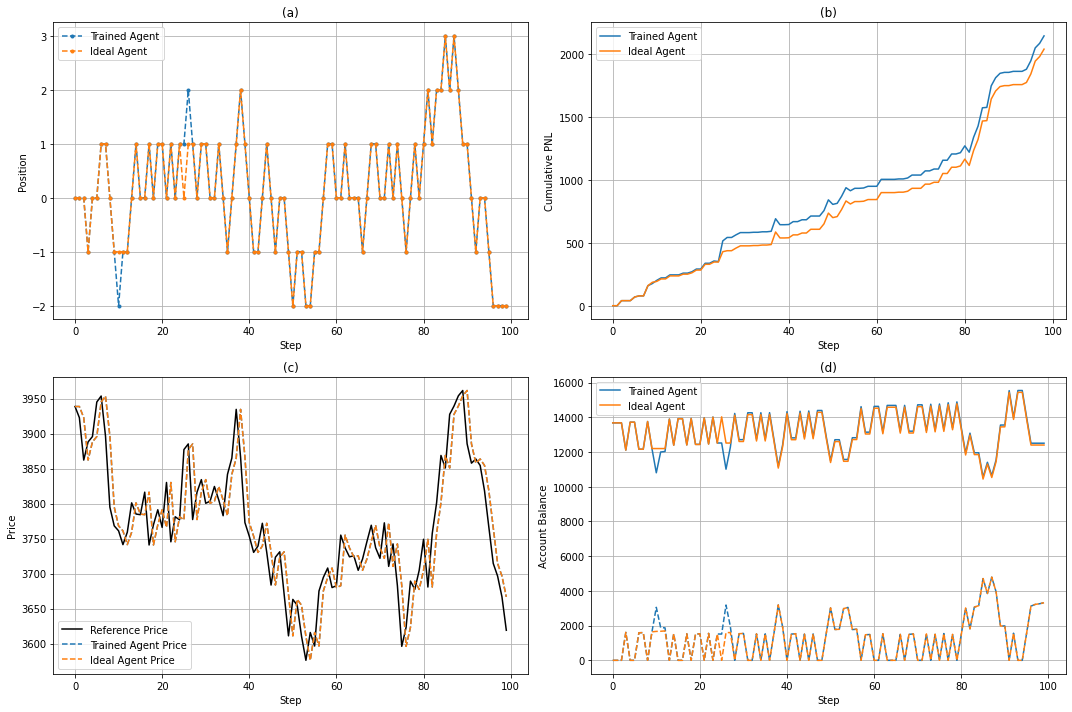

In [26]:
save_fig = True
fig_name = 'PMU_SimulationExample_1.png'
make_comparison_plots_square(results, 1, save_fig=save_fig)